In [6]:
import sys, threading
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt
sys.setrecursionlimit(10 ** 7)
threading.stack_size(2 ** 27)
random.seed(time.time())

In [7]:
def GCD(a, b):
    if b == 0:
        return a
    return GCD(b, a % b)

def extendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = extendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

def modularExponentiate(a, n, mod):
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    f = 1
    binaryB = bin(n)[2:]
    for i in range(len(binaryB)):
        f = (f*f) % mod
        if binaryB[i] == '1':
            f = (f * a) % mod
    return f
    
def modularInverse(a, n):
    (b, x) = extendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n
    return b

def ConvertToInt(message_str):  
    res = 0
    for i in range(len(message_str)):
        res = res * 256 + ord(message_str[i])
    return res

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

def Encrypt(m, e, n):
    m = ConvertToInt(m)
    c = modularExponentiate(m,e,n)
    return c

def getPublicKey(phi_n):
    e = random.randrange(1,phi_n)
    while e < 1 or GCD(e,phi_n) != 1:
        e = random.randrange(1,phi_n)
    return e

def getPrivateKey(e,p,q):
    phi_n = (p - 1) * (q - 1)
    d = modularInverse(e, phi_n)
    return d

def Decrypt(c, d, p, q):
    m = modularExponentiate(c, d, p * q)
    m = ConvertToStr(m)
    return m


def divideMsg(msg,n):
    msg_blocks=[]
    begin = 0
    msg_len = len(msg)
    step = math.floor(math.log(n,256))
    if(msg_len > math.log(n,256)): #need to divide
        for start in range(begin,len(msg),step):
            if(start + step > len(msg)-1):
                msg_blocks.append(msg[start:])
            else: msg_blocks.append(msg[start:start+step])   
    else: msg_blocks = msg
    return msg_blocks

In [9]:
"""
Parameter generation
on sign up generate large numbers of preferably 512 bits to be used as p and q
then generate random e such that gcd(e,phi(n)) = 1
e can be generated using nBitRandom then checking using GCD that the result is 1
d is the modular inverse of e mod(phi(n))
"""

#generating p and q
def nBitRandom(n):
    return random.getrandbits(n) + (2**(n-1)+1)

def fermatPrimalityTest(p):
    """
    a:random integer
    p:the number to test if prime or not
    """
    if p <= 1: return False
    for _ in range(1,102):
        # a=np.random.randint(1,p,dtype=np.int64)
        a=random.randint(1,p+1)
        aPowP = modularExponentiate(a,p,p)
        if (aPowP - a) % p != 0: return False
    return True



In [15]:
"""
Brute force attack
you need to factorize large n into 2 prime factors
factorization of n is unique, once you find 2 primes ur done

"""
# brute force attack

#responsible for factorization
def bruteForceAttack(n):
    #remember the properties of factorization, we only need to try up till square root of n
    for i in range(3,int(n**0.5)+1,2):
        if n % i == 0:
            return i

In [16]:
# Generate prime numbers less than N
def generatePrimeNumbers(N):
    # Returns a list of prime numbers less than N
    primeNumbers = []
    for i in range(2, N):
        if fermatPrimalityTest(i):  # Fermat's primality test
            primeNumbers.append(i)
    return primeNumbers

def generatePrime(n):
    if n == 1: return -1
    number = 1 
    while not fermatPrimalityTest(number):
        number = nBitRandom(n)
    return number

def generatePrimeModuli(n):
    p = 1
    q = 1
    nArray = []
    for i in range(2,int(n/2)+1):
        p = generatePrime(i)
        q = generatePrime(i)
        while p==q:
            q = generatePrime(i)
        nArray.append(p*q)
    return nArray


In [25]:
#revised brute force attack
def generate_N():
    f = open("nValues.txt", "w")
    n = 64
    p = 1
    q = 1
    nArray = []
    for i in range(2,int(n/2)+1):
        p = generatePrime(i)
        q = generatePrime(i)
        while ( p == q):
            q = generatePrime(i)
        n = p * q
        f.write("n="+str(n)+" p="+ str(p)+" q="+str(q) + "\n")
        nArray.append(n)
    return nArray
def bruteForceTime(nArray):
    f = open("nValuesAttack.txt", "w")
    time_taken = []
    for n_val in nArray:
        start_time = time.time()
        p =bruteForceAttack(n_val ) # Brute force attack
        end_time = time.time()
        time_taken.append(end_time - start_time) # Time taken to brute force attack
        f.write("n="+str(n_val)+" p="+ str(p)+" q="+str(n_val//p) + "\n")
    return time_taken
    

In [26]:
nArray= generate_N()
time_taken = bruteForceTime(nArray)

In [28]:
nArraybits = [len(bin(modulus)[2:]) for modulus in nArray]

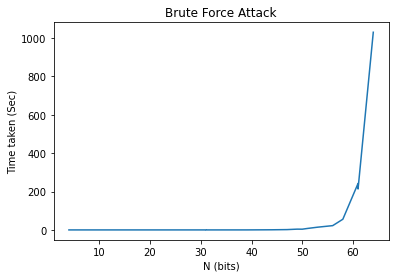

In [30]:
plt.plot(nArraybits, time_taken)
plt.xlabel('N (bits)')
plt.ylabel('Time taken (Sec)')
plt.title('Brute Force Attack')
plt.show()